## 1. input 데이터 생성
- random paramter에 대한 regression생성
- 그에 대해 난수값의 point찍는다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
# random regression, theta0= 3, theta1= 6
theta_0 = 3
theta_1 = 6
y = [] # 3+ 6*x => 회귀식에 해당하는 y값을 저장할 리스트
x = [ i for i in range(0,101)] #x값

for i in range(len(x)):
  y_arg = 3+ 6*x[i]
  y.append(y_arg)

Text(0.5, 1.0, 'random regression')

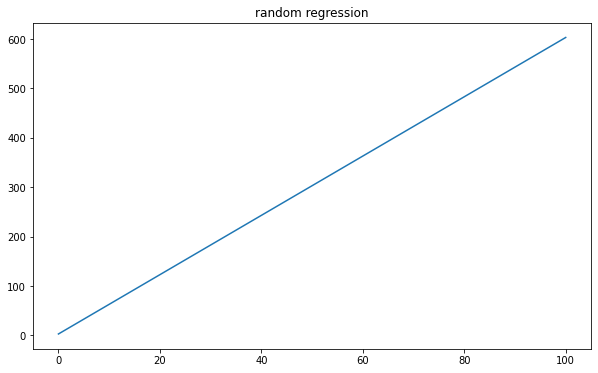

In [3]:
# 정한 회귀 직선 plotting
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title("random regression")

In [0]:
# 정한 회귀 직선을 바탕으로 데이터 생성하기 (오차  가우시안 오차)
mu = 0 # 정규분포에 대한 오차 파라미터값
sigma = 3


x_data = [] #오차를 생성하여 구한 x값
y_data = [] #오차를 생성하여 구한 y값

for i in range(100):
  error = np.random.normal(mu,sigma)
  x_data_arg = x[i]+error
  x_data.append(x_data_arg)
  y_data_arg = y[i]+error
  y_data.append(y_data_arg)

In [195]:
print(len(y_data), len(x_data)) #리스트 갯수 확인

100 100


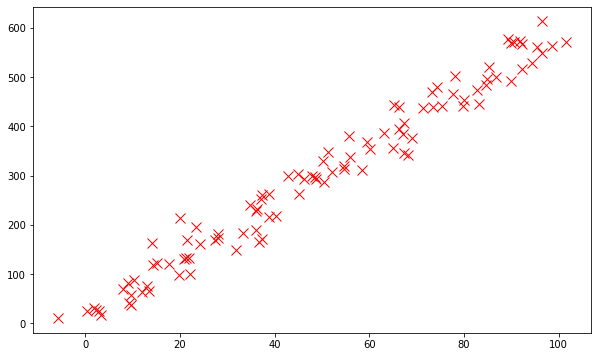

In [196]:
# plotting the data that we randomly make.
plt.figure(figsize=(10,6))
plt.plot(x_data,y_data,'rx', markersize=10)

## 2. cost function & Gradient descent
- cost에 대한 iteration을 convergence할 때까지 돌린다(Gradient Descent)
- 해당 cost값과 theta(parameters)값을 구한다. 

![image](https://user-images.githubusercontent.com/49298791/77844236-e614f400-71df-11ea-883b-16d5dac1a2ad.png)


- theta값을 하나의 벡터로 지정하려면 X, theta값을 변형한 형태의 array로 만들어 줘야 한다. (이 방법 사용)
- 혹은 theta0, theta1을 그대로 가져가면 복잡하긴 하지만 직관적으로 이해하긴 더 쉬울 것 같음

In [203]:
data = np.array([x_data,y_data]).T
data.shape # (X,y)형태로 한번에 저장한 배열

(100, 2)

In [0]:
# X벡터값과 theta값을 받았을 때, 도출할 수 있는 linear model
def h(theta,X):
  return X.dot(theta)

In [0]:
# Objective function
def ObjectiveFunction(theta, X, y):
  return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [0]:
# X에는 1인 열을 추가한 배열 형성, theta값은 0으로 초기화, y값은 reshape한 형태 필요
m = len(data[:,-1])
X = np.append(np.ones((m,1)),data[:,0].reshape(m,1),axis=1)
y = data[:,1].reshape(m,1)
theta = np.ones((2,1))

In [212]:
# ObjectiveFunction계산
print(ObjectiveFunction(theta,X,y))

40544.94234947596


In [0]:
# Gradient descent using Objective function
iteration = 100 #임의로 정한 하이퍼파라미터값
alpha = 0.01

def descendGradient(X, theta):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = [] 

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        J_history.append(ObjectiveFunction(theta,X,y))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp #(theta0, theta1)하나의 벡터로 저장한다. 
    return theta, theta_history, J_history

In [0]:
# Gradient descent계산
theta, theta_history, J_history = descendGradient(X,theta)

In [242]:
theta #확인

array([[-5.72519384e+148],
       [-3.78791239e+150]])

In [248]:
J_history[:50] #cost값 10개만 확인 

[40544.94234947596,
 39862457.02402658,
 39650503535.91522,
 39439795571768.89,
 3.9230218330148296e+16,
 3.9021754419932455e+19,
 3.881439826829725e+22,
 3.860814397795608e+25,
 3.840298569411203e+28,
 3.819891759272902e+31,
 3.7995933880730056e+34,
 3.779402879582145e+37,
 3.759319660632946e+40,
 3.739343161103777e+43,
 3.719472813902546e+46,
 3.6997080549506064e+49,
 3.6800483231667604e+52,
 3.6604930604513016e+55,
 3.6410417116701956e+58,
 3.6216937246393134e+61,
 3.6024485501087507e+64,
 3.5833056417472455e+67,
 3.564264456126659e+70,
 3.5453244527065524e+73,
 3.526485093818856e+76,
 3.507745844652574e+79,
 3.489106173238637e+82,
 3.470565550434778e+85,
 3.452123449910518e+88,
 3.433779348132228e+91,
 3.41553272434826e+94,
 3.3973830605741712e+97,
 3.3793298415780133e+100,
 3.361372554865708e+103,
 3.3435106906665005e+106,
 3.325743741918484e+109,
 3.3080712042542125e+112,
 3.2904925759863735e+115,
 3.2730073580935497e+118,
 3.255615054206065e+121,
 3.2383151705918686e+124,
 3.221

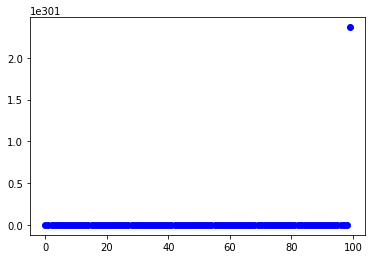

In [247]:
# cost값 plotting
plt.plot(range(len(J_history)),J_history,'bo')

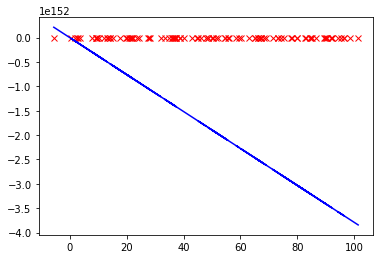

In [252]:
# fit되는 데이터 확인 
def final(x):
  return theta[0]+theta[1]*x

plt.plot(x_data, y_data, 'rx')
plt.plot(X[:,1], final(X[:,1]),'b-')